In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print(" Libraries loaded")

 Libraries loaded


## Step 1: Load Data (Both K=6 and K=25 Models)

**Comparative Analysis:** Test both models to determine which shows stronger correlations with WUI.

In [2]:
print("=" * 80)
print("LOADING DATA FOR DUAL-MODEL COMPARISON")
print("=" * 80)

# Load WUI data
df_wui = pd.read_csv('data/wui_quarterly_clean.csv')
# Rename columns: CSV has 'date' and 'WUI', we need 'quarter' and 'wui'
df_wui.columns = ['quarter', 'wui']
df_wui['quarter'] = pd.PeriodIndex(df_wui['quarter'], freq='Q')
df_wui = df_wui.set_index('quarter')

print(f"\n[1/3] WUI data loaded")
print(f"  Quarters: {df_wui.shape[0]}")
print(f"  Period: {df_wui.index.min()} to {df_wui.index.max()}")

# Load K=6 topic model
df_topics_k6 = pd.read_csv('data/unsc_topics_quarterly_k6.csv')
df_topics_k6['quarter'] = pd.PeriodIndex(df_topics_k6['quarter'], freq='Q')
df_topics_k6 = df_topics_k6.set_index('quarter')

print(f"\n[2/3] K=6 topic model loaded")
print(f"  Quarters: {df_topics_k6.shape[0]}")
print(f"  Topics: {df_topics_k6.shape[1]}")

# Load K=25 topic model
df_topics_k25 = pd.read_csv('data/unsc_topics_quarterly_k25.csv')
df_topics_k25['quarter'] = pd.PeriodIndex(df_topics_k25['quarter'], freq='Q')
df_topics_k25 = df_topics_k25.set_index('quarter')

print(f"\n[3/3] K=25 topic model loaded")
print(f"  Quarters: {df_topics_k25.shape[0]}")
print(f"  Topics: {df_topics_k25.shape[1]}")

print("\n" + "=" * 80)
print("BOTH MODELS READY FOR CORRELATION ANALYSIS")
print("=" * 80)

LOADING DATA FOR DUAL-MODEL COMPARISON

[1/3] WUI data loaded
  Quarters: 143
  Period: 1990Q1 to 2025Q3

[2/3] K=6 topic model loaded
  Quarters: 136
  Topics: 6

[3/3] K=25 topic model loaded
  Quarters: 136
  Topics: 25

BOTH MODELS READY FOR CORRELATION ANALYSIS


## Step 2: Merge Datasets (Both Models)

In [3]:
# Merge WUI with both topic models
df_merged_k6 = df_wui.join(df_topics_k6, how='inner')
df_merged_k25 = df_wui.join(df_topics_k25, how='inner')

print("=" * 80)
print("MERGED DATASETS")
print("=" * 80)

print(f"\nK=6 Model:")
print(f"  Shape: {df_merged_k6.shape}")
print(f"  Columns: {df_merged_k6.shape[1]} (1 WUI + {df_merged_k6.shape[1]-1} topics)")

print(f"\nK=25 Model:")
print(f"  Shape: {df_merged_k25.shape}")
print(f"  Columns: {df_merged_k25.shape[1]} (1 WUI + {df_merged_k25.shape[1]-1} topics)")

print(f"\n" + "=" * 80)
print("Sample (K=6 - first 5 quarters):")
print(df_merged_k6.head(5).round(3))

print(f"\n" + "=" * 80)
print("Sample (K=25 - first 5 quarters):")
print(df_merged_k25.head(5).round(3))

MERGED DATASETS

K=6 Model:
  Shape: (136, 7)
  Columns: 7 (1 WUI + 6 topics)

K=25 Model:
  Shape: (136, 26)
  Columns: 26 (1 WUI + 25 topics)

Sample (K=6 - first 5 quarters):
               wui  topic_1  topic_2  topic_3  topic_4  topic_5  topic_6
quarter                                                                 
1990Q1   12496.470    0.002    0.253    0.700    0.001    0.043    0.001
1990Q2    8769.965    0.002    0.171    0.629    0.138    0.044    0.015
1990Q3   16198.830    0.034    0.062    0.839    0.032    0.008    0.025
1990Q4   11872.270    0.074    0.175    0.636    0.100    0.005    0.010
1991Q1    8223.550    0.002    0.221    0.766    0.002    0.002    0.008

Sample (K=25 - first 5 quarters):
               wui  topic_1  topic_2  topic_3  topic_4  topic_5  topic_6  \
quarter                                                                    
1990Q1   12496.470    0.001    0.071    0.001    0.000    0.000    0.022   
1990Q2    8769.965    0.001    0.001    0.001   

## Step 3: Contemporaneous Correlations (Both Models)

Do topics correlate with WUI in the same quarter? **Compare K=6 vs K=25.**

In [4]:
print("=" * 80)
print("CONTEMPORANEOUS CORRELATIONS: K=6 MODEL")
print("=" * 80)

# K=6 Model
topic_cols_k6 = [f'topic_{i}' for i in range(1, 7)]
correlations_k6 = {}

for topic in topic_cols_k6:
    corr = df_merged_k6['wui'].corr(df_merged_k6[topic])
    _, p_value = stats.pearsonr(df_merged_k6['wui'], df_merged_k6[topic])
    correlations_k6[topic] = {'correlation': corr, 'p_value': p_value}
    
    sig = "***" if p_value < 0.01 else ("**" if p_value < 0.05 else ("*" if p_value < 0.10 else ""))
    print(f"{topic}: r = {corr:>7.4f}  (p = {p_value:.4f}) {sig}")

print("\n*** p < 0.01  ** p < 0.05  * p < 0.10")

# K=25 Model
print("\n" + "=" * 80)
print("CONTEMPORANEOUS CORRELATIONS: K=25 MODEL")
print("=" * 80)

topic_cols_k25 = [f'topic_{i}' for i in range(1, 26)]
correlations_k25 = {}

for topic in topic_cols_k25:
    corr = df_merged_k25['wui'].corr(df_merged_k25[topic])
    _, p_value = stats.pearsonr(df_merged_k25['wui'], df_merged_k25[topic])
    correlations_k25[topic] = {'correlation': corr, 'p_value': p_value}
    
    sig = "***" if p_value < 0.01 else ("**" if p_value < 0.05 else ("*" if p_value < 0.10 else ""))
    print(f"{topic}: r = {corr:>7.4f}  (p = {p_value:.4f}) {sig}")

print("\n*** p < 0.01  ** p < 0.05  * p < 0.10")

# Create correlation DataFrames
corr_df_k6 = pd.DataFrame(correlations_k6).T
corr_df_k25 = pd.DataFrame(correlations_k25).T

print("\n" + "=" * 80)
print("COMPARISON: STRONGEST CORRELATIONS")
print("=" * 80)

print("\nK=6 Model (Top 3):")
print(corr_df_k6.sort_values('correlation', key=abs, ascending=False).head(3))

print("\nK=25 Model (Top 5):")
print(corr_df_k25.sort_values('correlation', key=abs, ascending=False).head(5))

# Compare max absolute correlations
max_k6 = corr_df_k6['correlation'].abs().max()
max_k25 = corr_df_k25['correlation'].abs().max()

print("\n" + "=" * 80)
print("MODEL COMPARISON")
print("=" * 80)
print(f"K=6 strongest correlation:  |r| = {max_k6:.4f}")
print(f"K=25 strongest correlation: |r| = {max_k25:.4f}")

if max_k25 > max_k6:
    print(f"\n K=25 shows {(max_k25/max_k6 - 1)*100:.1f}% stronger correlation")
else:
    print(f"\n K=6 shows {(max_k6/max_k25 - 1)*100:.1f}% stronger correlation")

print("=" * 80)

CONTEMPORANEOUS CORRELATIONS: K=6 MODEL
topic_1: r =  0.4697  (p = 0.0000) ***
topic_2: r = -0.1883  (p = 0.0281) **
topic_3: r = -0.5780  (p = 0.0000) ***
topic_4: r =  0.4846  (p = 0.0000) ***
topic_5: r =  0.3471  (p = 0.0000) ***
topic_6: r =  0.4097  (p = 0.0000) ***

*** p < 0.01  ** p < 0.05  * p < 0.10

CONTEMPORANEOUS CORRELATIONS: K=25 MODEL
topic_1: r =  0.4191  (p = 0.0000) ***
topic_2: r =  0.0570  (p = 0.5095) 
topic_3: r = -0.1596  (p = 0.0635) *
topic_4: r = -0.0929  (p = 0.2821) 
topic_5: r =  0.3701  (p = 0.0000) ***
topic_6: r =  0.3237  (p = 0.0001) ***
topic_7: r =  0.1869  (p = 0.0294) **
topic_8: r =  0.4673  (p = 0.0000) ***
topic_9: r =  0.3473  (p = 0.0000) ***
topic_10: r = -0.3721  (p = 0.0000) ***
topic_11: r = -0.1676  (p = 0.0512) *
topic_12: r =  0.4638  (p = 0.0000) ***
topic_13: r =  0.2418  (p = 0.0046) ***
topic_14: r = -0.0198  (p = 0.8188) 
topic_15: r =  0.2779  (p = 0.0011) ***
topic_16: r =  0.3607  (p = 0.0000) ***
topic_17: r = -0.3663  (p = 0

In [5]:
# Add resolution count to both merged datasets
df_unsc_temp = pd.read_csv('data/unsc_resolutions_1990_2023.csv')
df_unsc_temp['quarter'] = pd.PeriodIndex(df_unsc_temp['quarter'], freq='Q')

# Count resolutions per quarter
resolution_counts = df_unsc_temp.groupby('quarter').size().reset_index(name='n_resolutions')

# Merge with both datasets
df_merged_k6 = df_merged_k6.join(resolution_counts.set_index('quarter')['n_resolutions'], how='left')
df_merged_k6['n_resolutions'] = df_merged_k6['n_resolutions'].fillna(0).astype(int)

df_merged_k25 = df_merged_k25.join(resolution_counts.set_index('quarter')['n_resolutions'], how='left')
df_merged_k25['n_resolutions'] = df_merged_k25['n_resolutions'].fillna(0).astype(int)

# Correlation: Resolution count vs WUI (use K=6 dataset, same WUI)
corr_count, p_count = stats.pearsonr(df_merged_k6['wui'], df_merged_k6['n_resolutions'])

print("=" * 80)
print("RESOLUTION COUNT vs WUI (Baseline)")
print("=" * 80)
print(f"Correlation: r = {corr_count:>7.4f}")
print(f"P-value:     p = {p_count:.4f}")
sig = "***" if p_count < 0.01 else ("**" if p_count < 0.05 else ("*" if p_count < 0.10 else ""))
print(f"Significance: {sig if sig else 'NOT SIGNIFICANT'}")

# Compare to strongest correlations from both models
print(f"\n Comparison to topic models:")
print(f"   Count correlation: |{corr_count:.4f}| = {abs(corr_count):.1%}")
print(f"   K=6 strongest:     |{max_k6:.4f}| = {max_k6:.1%}")
print(f"   K=25 strongest:    |{max_k25:.4f}| = {max_k25:.1%}")

if max_k25 > abs(corr_count):
    print(f"\n K=25 topics are {max_k25 / max(abs(corr_count), 0.001):.1f}x stronger than simple counting!")
if max_k6 > abs(corr_count):
    print(f" K=6 topics are {max_k6 / max(abs(corr_count), 0.001):.1f}x stronger than simple counting!")

print(f"\n Resolution count statistics:")
print(f"   Range: {df_merged_k6['n_resolutions'].min()} to {df_merged_k6['n_resolutions'].max()} resolutions/quarter")
print(f"   Mean: {df_merged_k6['n_resolutions'].mean():.1f} resolutions/quarter")
print(f"   Std: {df_merged_k6['n_resolutions'].std():.1f}")


RESOLUTION COUNT vs WUI (Baseline)
Correlation: r = -0.0659
P-value:     p = 0.4458
Significance: NOT SIGNIFICANT

 Comparison to topic models:
   Count correlation: |-0.0659| = 6.6%
   K=6 strongest:     |0.5780| = 57.8%
   K=25 strongest:    |0.5814| = 58.1%

 K=25 topics are 8.8x stronger than simple counting!
 K=6 topics are 8.8x stronger than simple counting!

 Resolution count statistics:
   Range: 3 to 31 resolutions/quarter
   Mean: 15.3 resolutions/quarter
   Std: 4.5


## Step 4: Lead-Lag Analysis (Both Models)

Do topics **predict** WUI changes 1-2 quarters ahead? **Test both K=6 and K=25.**

**Hypothesis:** UNSC focus shifts → Economic/political uncertainty follows with a lag

In [6]:
# Test lead-lag correlations for both models
lags = [1, 2, 3, 4]  # Test 1-4 quarter lags

print("=" * 80)
print("LEAD-LAG CORRELATIONS: K=6 MODEL")
print("=" * 80)
print("Testing if topic_t predicts WUI_{t+k}\n")

lag_results_k6 = []
for topic in topic_cols_k6:
    print(f"\n{topic}:")
    for lag in lags:
        # Shift WUI forward (topic at t correlates with WUI at t+lag)
        wui_shifted = df_merged_k6['wui'].shift(-lag)
        
        # Remove NaN values
        valid = ~(wui_shifted.isna() | df_merged_k6[topic].isna())
        
        if valid.sum() > 10:  # Need enough data
            corr = df_merged_k6.loc[valid, topic].corr(wui_shifted[valid])
            _, p_value = stats.pearsonr(df_merged_k6.loc[valid, topic], wui_shifted[valid])
            
            sig = "***" if p_value < 0.01 else ("**" if p_value < 0.05 else ("*" if p_value < 0.10 else ""))
            print(f"  Lag {lag}Q: r = {corr:>7.4f}  (p = {p_value:.4f}) {sig}")
            
            lag_results_k6.append({
                'model': 'K=6',
                'topic': topic,
                'lag': lag,
                'correlation': corr,
                'p_value': p_value
            })

print("\n*** p < 0.01  ** p < 0.05  * p < 0.10")

# K=25 Model
print("\n" + "=" * 80)
print("LEAD-LAG CORRELATIONS: K=25 MODEL")
print("=" * 80)
print("Testing if topic_t predicts WUI_{t+k}\n")

lag_results_k25 = []
for topic in topic_cols_k25:
    print(f"\n{topic}:")
    for lag in lags:
        wui_shifted = df_merged_k25['wui'].shift(-lag)
        valid = ~(wui_shifted.isna() | df_merged_k25[topic].isna())
        
        if valid.sum() > 10:
            corr = df_merged_k25.loc[valid, topic].corr(wui_shifted[valid])
            _, p_value = stats.pearsonr(df_merged_k25.loc[valid, topic], wui_shifted[valid])
            
            sig = "***" if p_value < 0.01 else ("**" if p_value < 0.05 else ("*" if p_value < 0.10 else ""))
            print(f"  Lag {lag}Q: r = {corr:>7.4f}  (p = {p_value:.4f}) {sig}")
            
            lag_results_k25.append({
                'model': 'K=25',
                'topic': topic,
                'lag': lag,
                'correlation': corr,
                'p_value': p_value
            })

print("\n*** p < 0.01  ** p < 0.05  * p < 0.10")

# Create lag results DataFrames
lag_df_k6 = pd.DataFrame(lag_results_k6)
lag_df_k25 = pd.DataFrame(lag_results_k25)

# Compare best lagged correlations
print("\n" + "=" * 80)
print("COMPARISON: STRONGEST LAGGED CORRELATIONS")
print("=" * 80)

print("\nK=6 Model (Top 5 lagged):")
print(lag_df_k6.sort_values('correlation', key=abs, ascending=False).head(5)[['topic', 'lag', 'correlation', 'p_value']])

print("\nK=25 Model (Top 5 lagged):")
print(lag_df_k25.sort_values('correlation', key=abs, ascending=False).head(5)[['topic', 'lag', 'correlation', 'p_value']])

print("=" * 80)

LEAD-LAG CORRELATIONS: K=6 MODEL
Testing if topic_t predicts WUI_{t+k}


topic_1:
  Lag 1Q: r =  0.4715  (p = 0.0000) ***
  Lag 2Q: r =  0.4773  (p = 0.0000) ***
  Lag 3Q: r =  0.5457  (p = 0.0000) ***
  Lag 4Q: r =  0.5213  (p = 0.0000) ***

topic_2:
  Lag 1Q: r = -0.1313  (p = 0.1290) 
  Lag 2Q: r = -0.0955  (p = 0.2724) 
  Lag 3Q: r = -0.1758  (p = 0.0429) **
  Lag 4Q: r = -0.1565  (p = 0.0731) *

topic_3:
  Lag 1Q: r = -0.5829  (p = 0.0000) ***
  Lag 2Q: r = -0.6068  (p = 0.0000) ***
  Lag 3Q: r = -0.6000  (p = 0.0000) ***
  Lag 4Q: r = -0.5914  (p = 0.0000) ***

topic_4:
  Lag 1Q: r =  0.4388  (p = 0.0000) ***
  Lag 2Q: r =  0.4498  (p = 0.0000) ***
  Lag 3Q: r =  0.4814  (p = 0.0000) ***
  Lag 4Q: r =  0.4087  (p = 0.0000) ***

topic_5:
  Lag 1Q: r =  0.2836  (p = 0.0009) ***
  Lag 2Q: r =  0.3101  (p = 0.0003) ***
  Lag 3Q: r =  0.3064  (p = 0.0003) ***
  Lag 4Q: r =  0.3583  (p = 0.0000) ***

topic_6:
  Lag 1Q: r =  0.5108  (p = 0.0000) ***
  Lag 2Q: r =  0.4898  (p = 0.0000) *

## Step 5: Visualize Topic-WUI Relationships (Both Models)

Plot time series for topics with strongest correlations from each model.

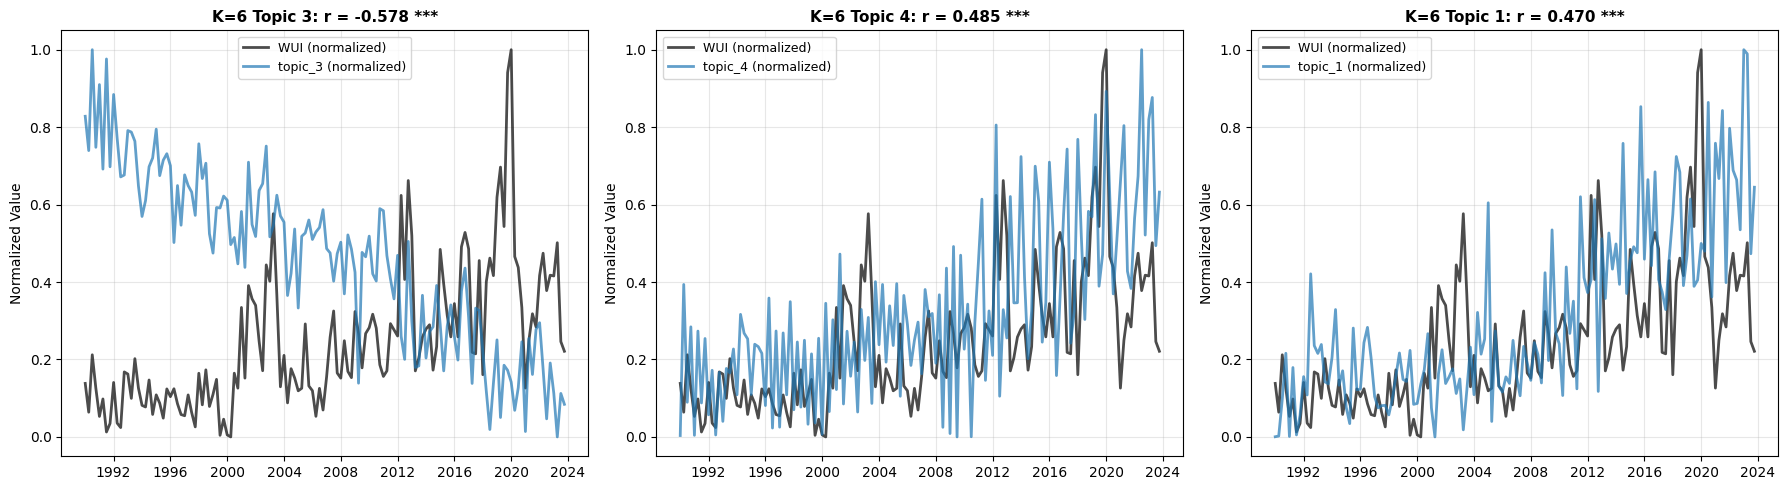

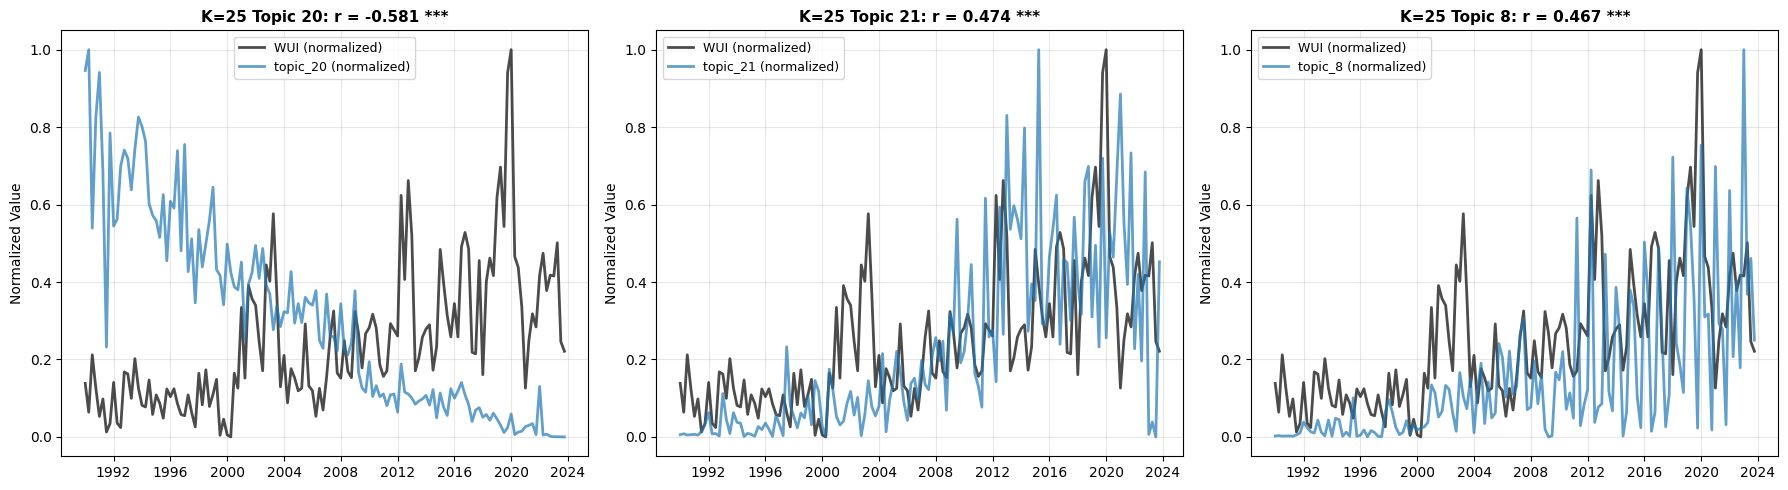

In [7]:
# Get top 3 topics from each model
top_topics_k6 = corr_df_k6.sort_values('correlation', key=abs, ascending=False).head(3).index.tolist()
top_topics_k25 = corr_df_k25.sort_values('correlation', key=abs, ascending=False).head(3).index.tolist()

# K=6 Model visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, topic in enumerate(top_topics_k6):
    ax = axes[idx]
    
    # Normalize both series to 0-1 for visual comparison
    topic_norm = (df_merged_k6[topic] - df_merged_k6[topic].min()) / (df_merged_k6[topic].max() - df_merged_k6[topic].min())
    wui_norm = (df_merged_k6['wui'] - df_merged_k6['wui'].min()) / (df_merged_k6['wui'].max() - df_merged_k6['wui'].min())
    
    # Plot
    quarters_ts = df_merged_k6.index.to_timestamp()
    ax.plot(quarters_ts, wui_norm, label='WUI (normalized)', linewidth=2, color='black', alpha=0.7)
    ax.plot(quarters_ts, topic_norm, label=f'{topic} (normalized)', linewidth=2, alpha=0.7)
    
    # Add correlation in title
    corr = correlations_k6[topic]['correlation']
    p = correlations_k6[topic]['p_value']
    sig = "***" if p < 0.01 else ("**" if p < 0.05 else ("*" if p < 0.10 else ""))
    
    ax.set_title(f'K=6 {topic.replace("_", " ").title()}: r = {corr:.3f} {sig}', 
                 fontsize=11, fontweight='bold')
    ax.set_ylabel('Normalized Value', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# K=25 Model visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, topic in enumerate(top_topics_k25):
    ax = axes[idx]
    
    # Normalize both series to 0-1 for visual comparison
    topic_norm = (df_merged_k25[topic] - df_merged_k25[topic].min()) / (df_merged_k25[topic].max() - df_merged_k25[topic].min())
    wui_norm = (df_merged_k25['wui'] - df_merged_k25['wui'].min()) / (df_merged_k25['wui'].max() - df_merged_k25['wui'].min())
    
    # Plot
    quarters_ts = df_merged_k25.index.to_timestamp()
    ax.plot(quarters_ts, wui_norm, label='WUI (normalized)', linewidth=2, color='black', alpha=0.7)
    ax.plot(quarters_ts, topic_norm, label=f'{topic} (normalized)', linewidth=2, alpha=0.7)
    
    # Add correlation in title
    corr = correlations_k25[topic]['correlation']
    p = correlations_k25[topic]['p_value']
    sig = "***" if p < 0.01 else ("**" if p < 0.05 else ("*" if p < 0.10 else ""))
    
    ax.set_title(f'K=25 {topic.replace("_", " ").title()}: r = {corr:.3f} {sig}', 
                 fontsize=11, fontweight='bold')
    ax.set_ylabel('Normalized Value', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Heatmap of All Correlations (Both Models)

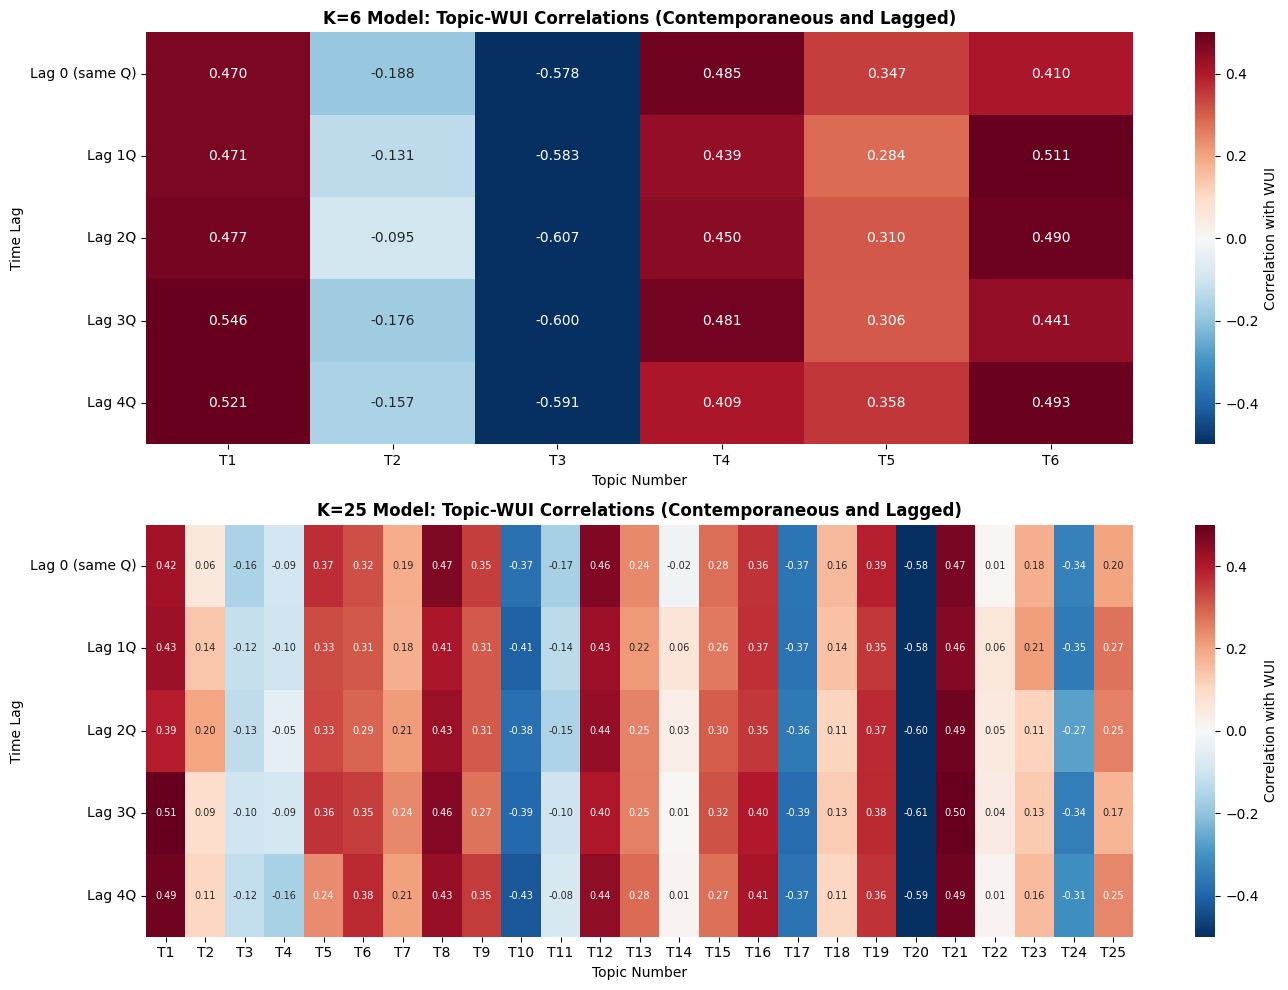

In [8]:
# K=6 Model heatmap
correlation_matrix_k6 = []

# Row 0: Contemporaneous
row = [correlations_k6[topic]['correlation'] for topic in topic_cols_k6]
correlation_matrix_k6.append(row)

# Rows 1-4: Lags 1-4
for lag in [1, 2, 3, 4]:
    row = []
    for topic in topic_cols_k6:
        lag_corr = lag_df_k6[(lag_df_k6['topic'] == topic) & (lag_df_k6['lag'] == lag)]['correlation'].values
        row.append(lag_corr[0] if len(lag_corr) > 0 else 0)
    correlation_matrix_k6.append(row)

# Create DataFrame
corr_matrix_df_k6 = pd.DataFrame(
    correlation_matrix_k6,
    columns=[f'T{i}' for i in range(1, 7)],
    index=['Lag 0 (same Q)', 'Lag 1Q', 'Lag 2Q', 'Lag 3Q', 'Lag 4Q']
)

# K=25 Model heatmap
correlation_matrix_k25 = []

# Row 0: Contemporaneous
row = [correlations_k25[topic]['correlation'] for topic in topic_cols_k25]
correlation_matrix_k25.append(row)

# Rows 1-4: Lags 1-4
for lag in [1, 2, 3, 4]:
    row = []
    for topic in topic_cols_k25:
        lag_corr = lag_df_k25[(lag_df_k25['topic'] == topic) & (lag_df_k25['lag'] == lag)]['correlation'].values
        row.append(lag_corr[0] if len(lag_corr) > 0 else 0)
    correlation_matrix_k25.append(row)

# Create DataFrame
corr_matrix_df_k25 = pd.DataFrame(
    correlation_matrix_k25,
    columns=[f'T{i}' for i in range(1, 26)],
    index=['Lag 0 (same Q)', 'Lag 1Q', 'Lag 2Q', 'Lag 3Q', 'Lag 4Q']
)

# Plot K=6 heatmap
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sns.heatmap(corr_matrix_df_k6, annot=True, fmt='.3f', cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Correlation with WUI'}, vmin=-0.5, vmax=0.5, ax=axes[0])
axes[0].set_title('K=6 Model: Topic-WUI Correlations (Contemporaneous and Lagged)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Topic Number', fontsize=10)
axes[0].set_ylabel('Time Lag', fontsize=10)

# Plot K=25 heatmap
sns.heatmap(corr_matrix_df_k25, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Correlation with WUI'}, vmin=-0.5, vmax=0.5, ax=axes[1], annot_kws={'size': 7})
axes[1].set_title('K=25 Model: Topic-WUI Correlations (Contemporaneous and Lagged)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Topic Number', fontsize=10)
axes[1].set_ylabel('Time Lag', fontsize=10)

plt.tight_layout()
plt.show()

## Step 7: Identify Most Promising Topics (Both Models)

In [9]:
# Summary of findings for both models
print("=" * 80)
print("SUMMARY: MOST PROMISING TOPICS FOR FORECASTING")
print("=" * 80)

# K=6 Model summary
print("\n" + "=" * 80)
print("K=6 MODEL")
print("=" * 80)

print("\n1. STRONGEST CONTEMPORANEOUS CORRELATIONS:")
print("-" * 80)
for topic, data in sorted(correlations_k6.items(), key=lambda x: abs(x[1]['correlation']), reverse=True):
    sig = "***" if data['p_value'] < 0.01 else ("**" if data['p_value'] < 0.05 else ("*" if data['p_value'] < 0.10 else ""))
    print(f"  {topic}: r = {data['correlation']:>7.4f} {sig}")

print("\n2. STRONGEST PREDICTIVE RELATIONSHIPS (lagged):")
print("-" * 80)
lag_df_k6_sorted = lag_df_k6.sort_values('correlation', key=abs, ascending=False).head(5)
for _, row in lag_df_k6_sorted.iterrows():
    sig = "***" if row['p_value'] < 0.01 else ("**" if row['p_value'] < 0.05 else ("*" if row['p_value'] < 0.10 else ""))
    print(f"  {row['topic']} (lag {int(row['lag'])}Q): r = {row['correlation']:>7.4f} {sig}")

# K=25 Model summary
print("\n" + "=" * 80)
print("K=25 MODEL")
print("=" * 80)

print("\n1. STRONGEST CONTEMPORANEOUS CORRELATIONS (Top 10):")
print("-" * 80)
for topic, data in sorted(correlations_k25.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)[:10]:
    sig = "***" if data['p_value'] < 0.01 else ("**" if data['p_value'] < 0.05 else ("*" if data['p_value'] < 0.10 else ""))
    print(f"  {topic}: r = {data['correlation']:>7.4f} {sig}")

print("\n2. STRONGEST PREDICTIVE RELATIONSHIPS (lagged, Top 10):")
print("-" * 80)
lag_df_k25_sorted = lag_df_k25.sort_values('correlation', key=abs, ascending=False).head(10)
for _, row in lag_df_k25_sorted.iterrows():
    sig = "***" if row['p_value'] < 0.01 else ("**" if row['p_value'] < 0.05 else ("*" if row['p_value'] < 0.10 else ""))
    print(f"  {row['topic']} (lag {int(row['lag'])}Q): r = {row['correlation']:>7.4f} {sig}")

print("\n" + "=" * 80)
print("3. RECOMMENDATIONS FOR FORECASTING MODELS:")
print("=" * 80)

# Find significant topics for each model
significant_k6 = set()
for topic, data in correlations_k6.items():
    if data['p_value'] < 0.10:
        significant_k6.add(topic)
for _, row in lag_df_k6.iterrows():
    if row['p_value'] < 0.10:
        significant_k6.add(row['topic'])

significant_k25 = set()
for topic, data in correlations_k25.items():
    if data['p_value'] < 0.10:
        significant_k25.add(topic)
for _, row in lag_df_k25.iterrows():
    if row['p_value'] < 0.10:
        significant_k25.add(row['topic'])

print(f"\nK=6 Model: {len(significant_k6)} significant topics (p < 0.10)")
if significant_k6:
    for topic in sorted(significant_k6):
        print(f"    • {topic}")

print(f"\nK=25 Model: {len(significant_k25)} significant topics (p < 0.10)")
if significant_k25:
    for topic in sorted(significant_k25):
        print(f"    • {topic}")

SUMMARY: MOST PROMISING TOPICS FOR FORECASTING

K=6 MODEL

1. STRONGEST CONTEMPORANEOUS CORRELATIONS:
--------------------------------------------------------------------------------
  topic_3: r = -0.5780 ***
  topic_4: r =  0.4846 ***
  topic_1: r =  0.4697 ***
  topic_6: r =  0.4097 ***
  topic_5: r =  0.3471 ***
  topic_2: r = -0.1883 **

2. STRONGEST PREDICTIVE RELATIONSHIPS (lagged):
--------------------------------------------------------------------------------
  topic_3 (lag 2Q): r = -0.6068 ***
  topic_3 (lag 3Q): r = -0.6000 ***
  topic_3 (lag 4Q): r = -0.5914 ***
  topic_3 (lag 1Q): r = -0.5829 ***
  topic_1 (lag 3Q): r =  0.5457 ***

K=25 MODEL

1. STRONGEST CONTEMPORANEOUS CORRELATIONS (Top 10):
--------------------------------------------------------------------------------
  topic_20: r = -0.5814 ***
  topic_21: r =  0.4745 ***
  topic_8: r =  0.4673 ***
  topic_12: r =  0.4638 ***
  topic_1: r =  0.4191 ***
  topic_19: r =  0.3882 ***
  topic_10: r = -0.3721 ***
  topi

## Step 8: Save Merged Datasets (Both Models)

In [10]:
# Save both merged datasets for modeling
output_file_k6 = 'data/wui_topics_merged_k6.csv'
output_file_k25 = 'data/wui_topics_merged_k25.csv'

df_merged_k6.to_csv(output_file_k6)
df_merged_k25.to_csv(output_file_k25)

print("=" * 80)
print("SAVED MERGED DATASETS")
print("=" * 80)

print(f"\n K=6 dataset: {output_file_k6}")
print(f"  Shape: {df_merged_k6.shape}")
print(f"  Ready for ARIMAX modeling!")

print(f"\n K=25 dataset: {output_file_k25}")
print(f"  Shape: {df_merged_k25.shape}")
print(f"  Ready for ARIMAX modeling!")

print("\n" + "=" * 80)

SAVED MERGED DATASETS

 K=6 dataset: data/wui_topics_merged_k6.csv
  Shape: (136, 8)
  Ready for ARIMAX modeling!

 K=25 dataset: data/wui_topics_merged_k25.csv
  Shape: (136, 27)
  Ready for ARIMAX modeling!

